### Maestría en Ciudades Sostenibles

# Manejo y Análisis de Datos
***
## Investigando Distribuciones

Mateo Neira
***

# Pruebas de Hipótesis y Regresión Lineal

**Objetivo:** Aplicar pruebas estadísticas para tomar decisiones basadas en datos y construir un modelo de regresión lineal simple para explorar relaciones entre variables.

## Creación de un Dataset Simulado

Para nuestros ejemplos, crearemos un DataFrame con datos simulados de propiedades. Esto nos da un entorno controlado para aplicar las pruebas.

In [2]:
# Importar librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm

# Configuración de estilo
sns.set_theme(style="whitegrid")

In [3]:
# Semilla para reproducibilidad
np.random.seed(42)

# Crear datos
n_propiedades = 200
data = {
    'area_m2': np.random.normal(100, 20, n_propiedades).clip(30), # Área media 100m2, desv 20
    'zona': np.random.choice(['A', 'B'], n_propiedades, p=[0.5, 0.5]),
}
df = pd.DataFrame(data)

# Generar precio basado en área y zona
# Las propiedades en la Zona B serán, en promedio, más caras
precio_base_A = df['area_m2'] * 1200 
precio_base_B = df['area_m2'] * 1500
ruido = np.random.normal(0, 20000, n_propiedades) # Ruido aleatorio

df['precio'] = np.where(df['zona'] == 'A', precio_base_A, precio_base_B) + ruido

# Generar si tiene balcón
# Mayor probabilidad de tener balcón en la Zona B
prob_balcon_A = 0.3
prob_balcon_B = 0.6
df['tiene_balcon'] = np.where(
    df['zona'] == 'A',
    np.random.choice(['Sí', 'No'], size=n_propiedades, p=[prob_balcon_A, 1-prob_balcon_A]),
    np.random.choice(['Sí', 'No'], size=n_propiedades, p=[prob_balcon_B, 1-prob_balcon_B])
)


print("Primeras 5 filas del dataset:")
print(df.head())
print("\nDescripción del dataset:")
print(df.describe())
print("\nPrecios medios por zona:")
print(df.groupby('zona')['precio'].mean())

df.head()

Primeras 5 filas del dataset:
      area_m2 zona         precio tiene_balcon
0  109.934283    B  162726.221621           Sí
1   97.234714    B  153886.305407           Sí
2  112.953771    B  183233.535977           Sí
3  130.460597    B  187666.486255           No
4   95.316933    A  118862.168643           No

Descripción del dataset:
          area_m2         precio
count  200.000000     200.000000
mean    99.184581  133571.325225
std     18.620078   35031.594923
min     47.605098   43645.669589
25%     85.897447  111155.481184
50%     99.916162  133668.119810
75%    110.017049  156365.221993
max    154.403383  242197.520852

Precios medios por zona:
zona
A    117113.939409
B    148762.758286
Name: precio, dtype: float64


,area_m2,zona,precio,tiene_balcon
0,109.934283,B,162726.221621,Sí
1,97.234714,B,153886.305407,Sí
2,112.953771,B,183233.535977,Sí
3,130.460597,B,187666.486255,No
4,95.316933,A,118862.168643,No


## Prueba t-Student para Muestras Independientes

**Pregunta:** ¿Existe una diferencia estadísticamente significativa en el `precio` medio de las propiedades entre la `zona` A y la `zona` B?

*   **Hipótesis Nula (H₀):** No hay diferencia en el precio medio entre la Zona A y la Zona B. (μ_A = μ_B)
*   **Hipótesis Alternativa (H₁):** Sí hay una diferencia en el precio medio. (μ_A ≠ μ_B)

Estadístico t: -7.1398
P-valor: 0.0000

Conclusión: Rechazamos la hipótesis nula.
Hay una diferencia estadísticamente significativa en los precios medios entre las zonas A y B.


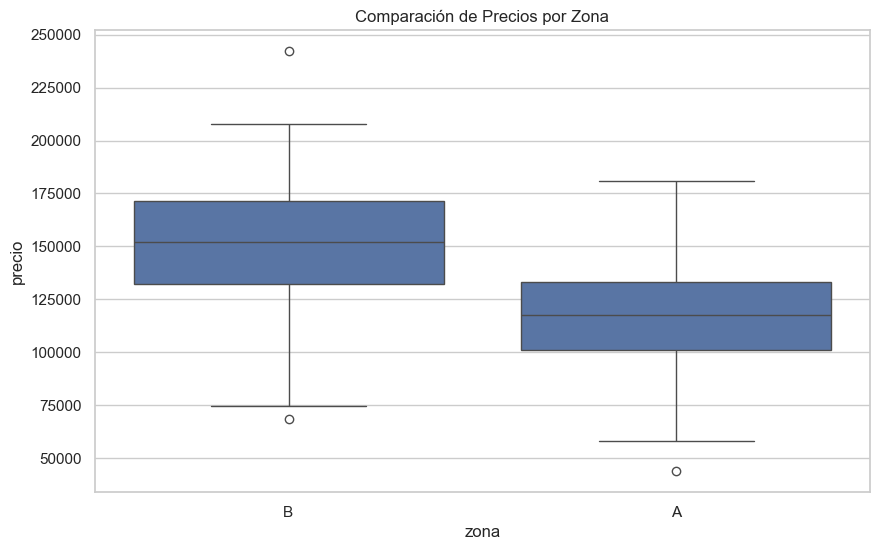

In [4]:
# Separar los precios por zona
precios_A = df[df['zona'] == 'A']['precio']
precios_B = df[df['zona'] == 'B']['precio']

# Realizar la prueba t
t_stat, p_valor_t = stats.ttest_ind(precios_A, precios_B)

print(f"Estadístico t: {t_stat:.4f}")
print(f"P-valor: {p_valor_t:.4f}")

# Interpretación
alpha = 0.05
if p_valor_t < alpha:
    print("\nConclusión: Rechazamos la hipótesis nula.")
    print("Hay una diferencia estadísticamente significativa en los precios medios entre las zonas A y B.")
else:
    print("\nConclusión: No podemos rechazar la hipótesis nula.")
    print("No hay evidencia suficiente para afirmar que hay una diferencia en los precios medios.")

# Visualización
plt.figure(figsize=(10, 6))
sns.boxplot(x='zona', y='precio', data=df)
plt.title('Comparación de Precios por Zona')
plt.show()

## Prueba Chi-cuadrado (χ²) de Independencia

**Pregunta:** ¿Hay una relación entre la `zona` de una propiedad y si `tiene_balcon`?

*   **Hipótesis Nula (H₀):** La `zona` y si `tiene_balcon` son variables independientes. No hay relación.
*   **Hipótesis Alternativa (H₁):** Las variables son dependientes. Hay una relación.

In [5]:
# Crear una tabla de contingencia
tabla_contingencia = pd.crosstab(df['zona'], df['tiene_balcon'])
print("Tabla de Contingencia (Observada):")
print(tabla_contingencia)

# Realizar la prueba Chi-cuadrado
chi2_stat, p_valor_chi2, dof, expected = stats.chi2_contingency(tabla_contingencia)

print(f"\nEstadístico Chi-cuadrado: {chi2_stat:.4f}")
print(f"P-valor: {p_valor_chi2:.4f}")

# Interpretación
if p_valor_chi2 < alpha:
    print("\nConclusión: Rechazamos la hipótesis nula.")
    print("Hay una asociación estadísticamente significativa entre la zona y tener balcón.")
else:
    print("\nConclusión: No podemos rechazar la hipótesis nula.")
    print("No hay evidencia de una asociación entre la zona y tener balcón.")

Tabla de Contingencia (Observada):
tiene_balcon  No  Sí
zona                
A             67  29
B             43  61

Estadístico Chi-cuadrado: 15.1912
P-valor: 0.0001

Conclusión: Rechazamos la hipótesis nula.
Hay una asociación estadísticamente significativa entre la zona y tener balcón.


# Ejercicio

Utiliza el Boston House Price dataset para realizar pruebas de diferencia de medias.

Define al menos una variable categórica que divida los datos en dos o más grupos (por ejemplo, CHAS o grupos basados en CRIM o RM).

Formula claramente la hipótesis nula (H₀) y la hipótesis alternativa (H₁).

Aplica una prueba estadística adecuada para comparar las medias.

Interpreta los resultados, indicando si existen diferencias significativas entre los grupos.